<a href="https://colab.research.google.com/github/N1sChaLLL/E-Sangrahan/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('lab5data.csv', header=None)

In [ ]:
data.head()

0        1         2  3
0  0.000000  0.00000  0.205839  0
1  0.000000  0.48786  0.221257  0
2  0.071341  0.00000  0.284568  0
3  0.000000  0.00000  0.000000  0
4  0.000000  0.00000  0.000000  0

In [ ]:
#Question 1
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('lab5data.csv', header=None)

# Select the first two columns by index (0 and 1)
X = data[[0]]  # Feature
y = data[1]    # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression().fit(X_train, y_train)

# Predict on training data
y_train_pred = model.predict(X_train)

print("Training Predictions:")
print(y_train_pred)


Training Predictions:
[0.02250136 0.01562975 0.01972194 ... 0.01562975 0.01562975 0.01562975]


In [ ]:
#Question 2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Predict on test data
y_test_pred = model.predict(X_test)

# Calculate metrics
mse_test, rmse_test, mape_test, r2_test = calculate_metrics(y_test, y_test_pred)

print("Test Metrics:")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAPE: {mape_test}%")
print(f"Test R2: {r2_test}")


Test Metrics:
Test MSE: 0.006308925285023101
Test RMSE: 0.07942874344356142
Test MAPE: inf%
Test R2: 0.003314127718623161


In [ ]:
#Question 3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('lab5data.csv', header=None)

# Use all columns except the last as features (X), and the last column as the target (y)
X = data.iloc[:, :-1]  # All columns except the last one as features
y = data.iloc[:, -1]   # Last column as the target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using all features
model = LinearRegression().fit(X_train, y_train)

# Predict on training data
y_train_pred = model.predict(X_train)

print("Training Predictions with all attributes:")
print(y_train_pred)



Training Predictions with all attributes:
[0.0645057  0.05864885 0.04898862 ... 0.05864885 0.05864885 0.04635047]


In [ ]:
#Question 4
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('lab5data.csv', header=None)

# Use all columns except the last as features (X), ignoring the target variable
X = data.iloc[:, :-1]  # All columns except the last one for clustering

# Split the data into training and test sets (although clustering doesn't require labels, we'll split for consistency)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

# Get the labels (cluster assignments) for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

print("Cluster Labels:")
print(labels)

print("\nCluster Centers:")
print(cluster_centers)


Cluster Labels:
[0 0 1 ... 0 0 1]

Cluster Centers:
[[0.05221295 0.01175365 0.0493682 ]
 [0.12831955 0.02817534 0.39614528]]


In [ ]:
#Question 5
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate the Silhouette Score
sil_score = silhouette_score(X_train, labels)

# Calculate the Calinski-Harabasz Score (CH Score)
ch_score = calinski_harabasz_score(X_train, labels)

# Calculate the Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(X_train, labels)

# Print the results
print("\nSilhouette Score:", sil_score)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Index:", db_index)


Silhouette Score: 0.4951548424377185
Calinski-Harabasz Score: 12520.988822633253
Davies-Bouldin Index: 0.8418076883379086


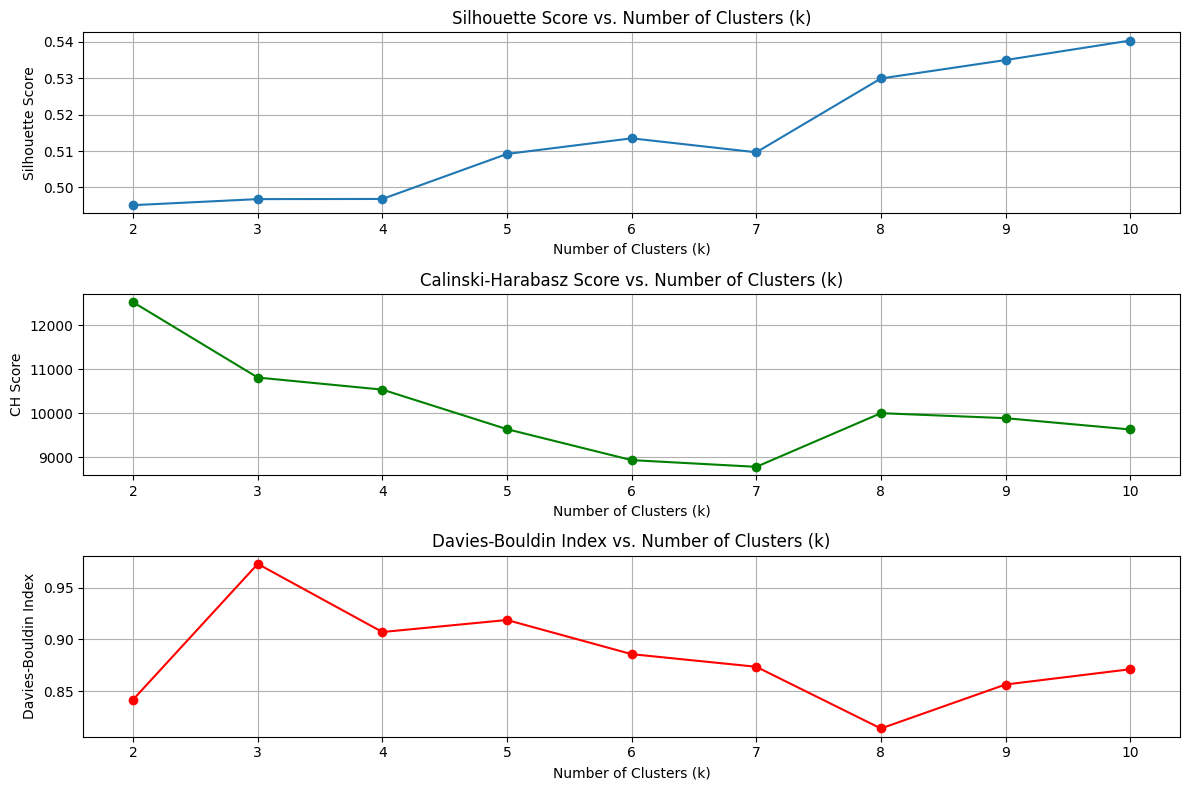

In [ ]:
#Question 6
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define range for k values (number of clusters)
k_values = range(2, 11)  # k from 2 to 10

# Lists to store the evaluation metrics for each k
sil_scores = []
ch_scores = []
db_indices = []

# Loop through different k values and evaluate clustering
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    labels = kmeans.labels_

    # Compute the metrics for the current k
    sil_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_indices.append(davies_bouldin_score(X_train, labels))

# Plotting the metrics
plt.figure(figsize=(12, 8))

# Plot Silhouette Score
plt.subplot(3, 1, 1)
plt.plot(k_values, sil_scores, marker='o', label="Silhouette Score")
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plot Calinski-Harabasz Score
plt.subplot(3, 1, 2)
plt.plot(k_values, ch_scores, marker='o', color='green', label="CH Score")
plt.title('Calinski-Harabasz Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CH Score')
plt.grid(True)

# Plot Davies-Bouldin Index
plt.subplot(3, 1, 3)
plt.plot(k_values, db_indices, marker='o', color='red', label="DB Index")
plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


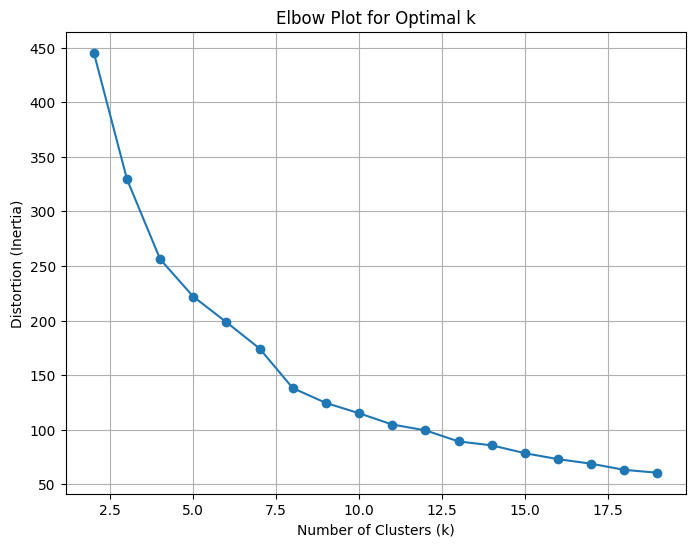

In [ ]:
#Question 7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store the distortions (inertia)
distortions = []

# Compute the distortions (inertia) for k values from 2 to 19
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Plot for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()
